template: [0.         0.48175367 0.84432793 0.99802673 0.90482705 0.58778525
 0.12533323 0.36812455 0.77051324 0.98228725 0.95105652 0.68454711
 0.24868989 0.24868989 0.68454711 0.95105652 0.98228725 0.77051324
 0.36812455 0.12533323 0.58778525 0.90482705 0.99802673 0.84432793
 0.48175367]

wave: [0.         0.48175367 0.84432793 0.99802673 0.90482705 0.58778525
 0.12533323 0.73624911 1.54102649 1.9645745  1.90211303 0.68454711
 0.24868989 0.24868989 0.68454711 0.95105652 0.98228725 0.77051324
 0.36812455 0.12533323 0.58778525 0.90482705 0.99802673 0.84432793
 0.48175367]

time: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

spike: [0.         0.         0.         0.         0.         0.
 0.         0.36812455 0.77051324 0.98228725 0.95105652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]

template plot: 


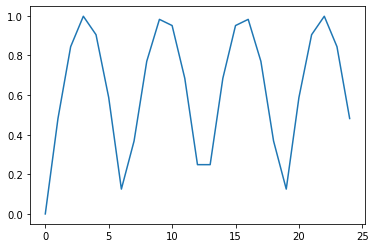

wave plot: 


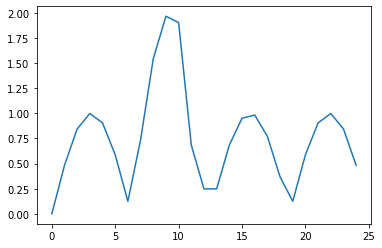

spike plot: 


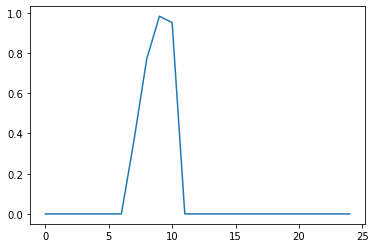

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

cycles = 2 # how many sine cycles
resolution = 25 # how many datapoints to generate

length = np.pi * 2 * cycles
my_template = np.abs(np.sin(np.arange(0, length, length / resolution)))
my_wave = np.copy(my_template)
my_spike = np.copy(my_wave)

for i in range(7, 11):
    my_wave[i] *= 2

my_time = np.arange(len(my_wave))

for i in range(len(my_time)):
    if not (i >= 7 and i < 11):
        my_spike[i] = 0

print("template: " + str(my_template) + "\n")
print("wave: " + str(my_wave) + "\n")
print("time: " + str(my_time) + "\n")
print("spike: " + str(my_spike) + "\n")

print("template plot: ")
plt.plot(my_time, my_template)
plt.show()
print("wave plot: ")
plt.plot(my_time, my_wave)
plt.show()
print("spike plot: ")
plt.plot(my_time, my_spike)
plt.show()

In [103]:
def wiener_filter(data, template, p=False):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    w_filter = np.abs(np.convolve(data_fft, template_fft, mode='same'))
    
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter2(data, template, p=False):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    w_filter = np.abs(np.fft.fft(data_fft * template_fft))
    
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter3(data, template, p=False):
    w_filter = np.abs(np.convolve(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter4(data, template, p=False):
    w_filter = np.abs(signal.fftconvolve(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter5(data, template, p=False):
    w_filter = np.abs(signal.correlate(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def timeseries_plot(data):
    timesteps = np.arange(len(data))
    plt.plot(timesteps, data)
    plt.show()

In [104]:
slope = np.linspace(0, 0.5, num=len(my_wave))
filtered = wiener_filter(my_wave, my_template)
filtered2 = wiener_filter2(my_wave, my_template)
filtered3 = wiener_filter3(my_wave, my_template)
filtered4 = wiener_filter4(my_wave, my_template)
filtered5 = wiener_filter5(my_wave, my_template)
filtered_spike = wiener_filter5(my_wave, my_spike)

filter plot 1:


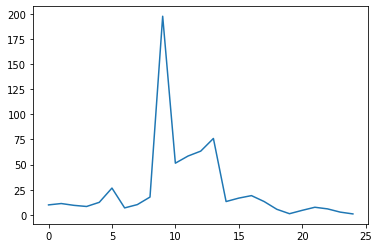

filter plot 2:


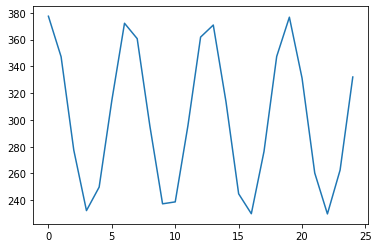

filter plot 3:


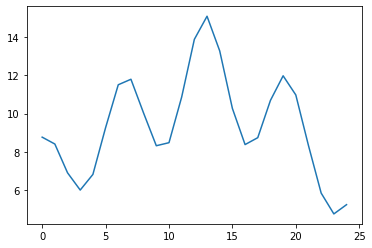

filter plot 4:


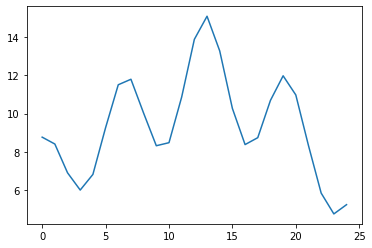

filter plot 5:


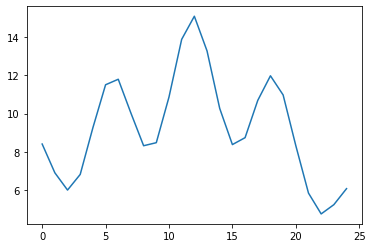

filter spike:


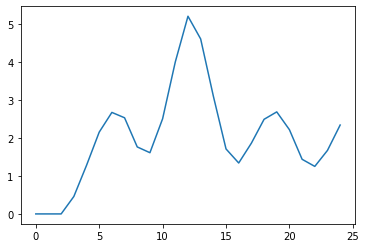

In [105]:
print("filter plot 1:")
timeseries_plot(filtered)
print("filter plot 2:")
timeseries_plot(filtered2)
print("filter plot 3:")
timeseries_plot(filtered3)
print("filter plot 4:")
timeseries_plot(filtered4)
print("filter plot 5:")
timeseries_plot(filtered5)
print("filter spike:")
timeseries_plot(filtered_spike)

In [ ]:
my_template_s = my_template * 1/2
print("template_s: " + str(my_template_s) + "\n")
plt.plot(my_time, my_template_s)
plt.show()
filtered_s = wiener_filter(my_wave, my_template)

print("filter plot (suppressed):")
timeseries_plot(filtered_s)

In [ ]:
my_template_cos = np.abs(np.cos(np.arange(0, length, length / resolution)))
print("template cos: " + str(my_template_cos) + "\n")
print("template plot: ")
plt.plot(my_time, my_template_cos)
plt.show()

filtered_cos = wiener_filter(my_wave, my_template_cos)

print("filter plot (cosine):")
timeseries_plot(filtered_cos)

In [ ]:
my_template_zeros = np.zeros(len(my_time))
print("template zeros: " + str(my_template_zeros) + "\n")
print("template plot: ")
plt.plot(my_time, my_template_zeros)
plt.show()

filtered_cos = wiener_filter(my_wave, my_template_zeros)

print("filter plot (zeros):")
timeseries_plot(filtered_cos)

In [ ]:
filtered3 = wiener_filter3(my_wave, my_template)
print("filter plot (?):")
timeseries_plot(filtered2)

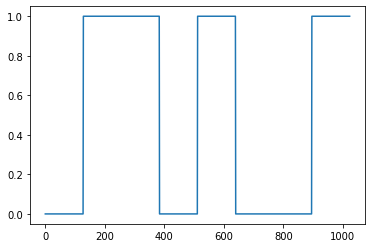

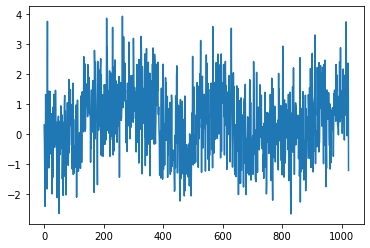

In [108]:
rng = np.random.default_rng()
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
timeseries_plot(sig)
timeseries_plot(sig_noise)

filter plot 1:


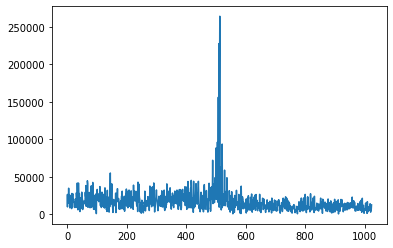

filter plot 2:


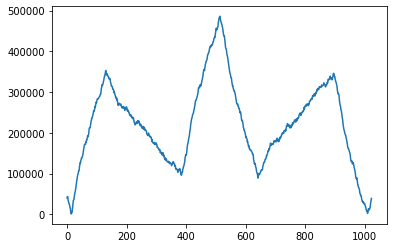

filter plot 3:


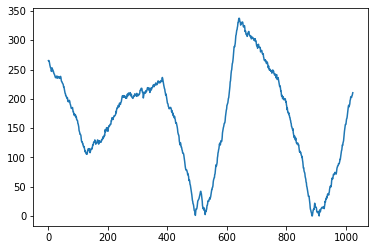

filter plot 4:


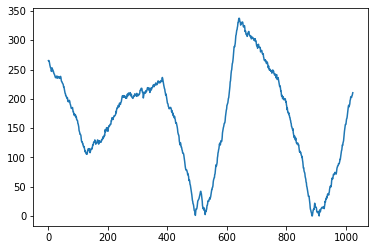

filter plot 5:


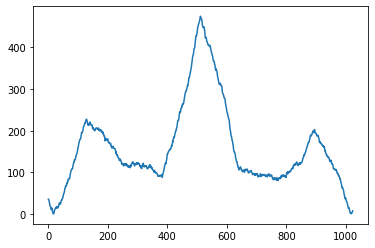

In [109]:
filtered = wiener_filter(sig_noise, sig)
filtered2 = wiener_filter2(sig_noise, sig)
filtered3 = wiener_filter3(sig_noise, sig)
filtered4 = wiener_filter4(sig_noise, sig)
filtered5 = wiener_filter5(sig_noise, sig)
print("filter plot 1:")
timeseries_plot(filtered)
print("filter plot 2:")
timeseries_plot(filtered2)
print("filter plot 3:")
timeseries_plot(filtered3)
print("filter plot 4:")
timeseries_plot(filtered4)
print("filter plot 5:")
timeseries_plot(filtered5)